# Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')


# Step1 : Create a Pandas Dataframe from the data

In [74]:
df = pd.read_csv("~/Documents/tmdb-movies.csv")
df.shape

(10866, 21)

# Step 2 :  Inspect the dataset to understand its structure.

#df.shape  
df.info()

# Step 3 : Clean the data

## Remove duplicate rows & unwanted columns  

df.drop_duplicates() # have the option of keeping the first or the last occurence.
df.drop()
check with df.columns

In [78]:
df.drop(['id','imdb_id','homepage','tagline', 'keywords','overview'],axis=1,inplace=True)
df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [79]:
df.shape

(10866, 15)

In [84]:

#df.duplicated().sum()
#df.duplicated().sum()
df[df.duplicated()]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [83]:
df.drop_duplicates()
df.shape

(10866, 15)

##  Check the datatypes of columns
### Change the data type of any column(s) if needed

df.dtypes

## Get the count of zero values in each column
### Decide whether to remove the rows or impute them.



In [175]:
#df.isin([0]).sum()

## Get the count of null values in each column
### Decide whether to remove the rows or impute them based on the count of the null values

In [176]:
#df.isnull().sum()


## Replace '0' values with NaN and then fill those NaN with appropritate value.


In [ ]:
replace(0,np.nan)
fillna(mean or median,inplace=True)

# Step 4 : Find answers to questions

##  Basic Descriptive statistics

In [181]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


## Distribution of features


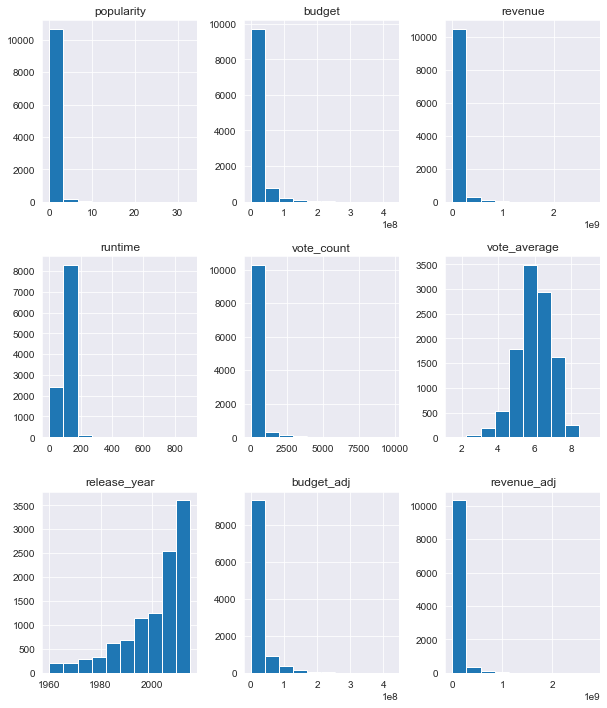

In [182]:
df.hist(figsize=(10,12));

## Q1: Correlation between budget, revenue and popularity


In [180]:
## Correlation between budget, revenue and popularity

df_popular = pd.DataFrame(df,columns=['budget_adj','revenue_adj','popularity'])
df_popular
cor = df_popular.corr()


## Heat Map


In [102]:
df_popular = pd.DataFrame(df,columns=['budget_adj','revenue_adj','popularity'])
cor = df_popular.corr()
#cor

In [179]:
#x_axis_labels = ['budget','revenue','popular'] 
#y_axis_labels = ['budget','revenue','popular'] 
#sns.heatmap(cor, annot=True,xticklabels=x_axis_labels, yticklabels=y_axis_labels)
#plt.show()

## Q2 : What are the top 10 movies in terms of revenue ?

In [ ]:
df_top10 = df.nlargest(10, ['revenue_adj'])
movies = df_top10['original_title'].to_list()
revenue =  df_top10['revenue_adj'].to_list()


# Question 3: Which movie genre is made the most often?¶


In [97]:
genres = df['genres'].str.split('|')
genres

0        [Action, Adventure, Science Fiction, Thriller]
1        [Action, Adventure, Science Fiction, Thriller]
2                [Adventure, Science Fiction, Thriller]
3         [Action, Adventure, Science Fiction, Fantasy]
4                             [Action, Crime, Thriller]
                              ...                      
10861                                     [Documentary]
10862                        [Action, Adventure, Drama]
10863                                 [Mystery, Comedy]
10864                                  [Action, Comedy]
10865                                          [Horror]
Name: genres, Length: 10866, dtype: object

In [107]:
#df_genres = df.assign(genres = df['genres'].str.split('|'))
#df_genres
#df_genres =df.assign(genres = df['genres'].str.split('|')).explode('genres')
#df_genres.head(10)

In [106]:
#x_axis_labels = ['budget','revenue','popular'] 
#y_axis_labels = ['budget','revenue','popular'] 
#sns.heatmap(cor, annot=True,xticklabels=x_axis_labels, yticklabels=y_axis_labels)
#plt.show()

## Scatter plot

In [156]:
#df_genres.plot.scatter('genres', 'Movies_count')  # this is wrong-chk
#plt.show()

## Create a new dataframe for genres and respective movies count

In [157]:
#df_genres.groupby(['genres'])

#df_genres.groupby(['genres']).count()
#df_g = df_genres.groupby(['genres'])['release_year'].count()
df_g = df_genres.groupby(['genres'])['release_year'].count().to_frame(name = 'Movies_count')
#df_g


## Plot bar chart for genres


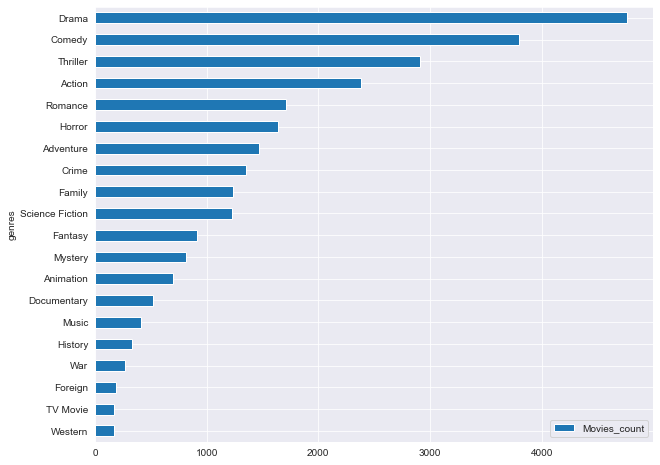

In [144]:
#df_g.plot(kind ='barh',figsize=(10,8));
df_g.sort_values(['Movies_count'], ascending = False).plot(kind = 'barh',figsize=(10,8));
plt.gca().invert_yaxis()


In [174]:
#df.boxplot(column=['revenue_adj','budget_adj']);

In [171]:
#df.plot.scatter(x='vote_average', y='popularity')
#plt.show()

## Problems -June 7
1. Which year has the highest release of movies?
2. Which Movie Has The Highest Or Lowest Profit? 

# Read the cleaned dataset

In [2]:
df_clean = pd.read_csv("~/Documents/Udacity nanodegree material/tmdb-movies-clean.csv")
df_clean.shape

(9772, 15)

In [3]:
df_clean.columns


Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [93]:
year_count  = df_clean['release_year'].value_counts()
year_count

2014    635
2013    567
2015    558
2012    498
2009    474
2011    456
2008    441
2010    420
2007    389
2006    350
2005    323
2003    254
2004    253
2002    241
2001    212
1999    212
1996    196
2000    196
1998    191
1997    180
1994    174
1993    172
1995    170
1988    132
1989    128
1992    126
1990    126
1991    125
1987    113
1986    109
1985    106
1984     99
1982     80
1981     78
1983     77
1980     73
1978     61
1979     56
1971     55
1973     55
1977     55
1976     46
1966     44
1974     44
1975     42
1964     41
1970     40
1968     37
1972     37
1967     36
1963     34
1965     34
1960     32
1961     30
1962     30
1969     29
Name: release_year, dtype: int64

In [94]:
year_max_movies = df_clean['release_year'].value_counts().nlargest(1)
year_max_movies 

2014    635
Name: release_year, dtype: int64

# Add a new column for profit 

In [24]:
# add a new column for profit

df_clean['profit'] = df_clean['revenue_adj'] - df_clean['budget_adj']
df_clean['profit'].head(5)

0    1.254446e+09
1    2.101614e+08
2    1.704191e+08
3    1.718723e+09
4    1.210949e+09
Name: profit, dtype: float64

In [25]:
df_clean.shape

(9772, 16)

# Find the row with highest profit

In [83]:
df_top_profit = df_clean.nlargest(1, ['profit'])
df_top_profit

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
1193,12.037933,11000000.0,775398007.0,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,1977-03-20,4428,7.9,1977,3.957559e+07,2.789712e+09,2.750137e+09


# Get the name of the movie

In [85]:
df_top_profit['original_title']

1193    Star Wars
Name: original_title, dtype: object

# Find the row with lowest profit

In [91]:
df_low_profit = df_clean.nsmallest(1,['profit'])
df_low_profit

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
2032,0.25054,425000000.0,11087569.0,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,2010-12-02,74,6.4,2010,425000000.0,11087569.0,-413912431.0


# Get the name of the movie

In [90]:
df_low_profit['original_title']

2032    The Warrior's Way
Name: original_title, dtype: object

In [92]:
df_clean['profit'].value_counts

<bound method IndexOpsMixin.value_counts of 0       1.254446e+09
1       2.101614e+08
2       1.704191e+08
3       1.718723e+09
4       1.210949e+09
            ...     
9767    7.818962e+07
9768    7.818962e+07
9769    7.818962e+07
9770    7.818962e+07
9771    1.149497e+08
Name: profit, Length: 9772, dtype: float64>

In [87]:
max_profit = df_clean['profit'].max()
print(max_profit)
max_profit_exp = np.format_float_scientific(max_profit,exp_digits=5)
print(max_profit_exp)

2750136650.919176
2.750136650919176e+00009


df_clean[max_profit_exp]

In [57]:
df_clean[['profit']]

0       1.254446e+09
1       2.101614e+08
2       1.704191e+08
3       1.718723e+09
4       1.210949e+09
            ...     
9767    7.818962e+07
9768    7.818962e+07
9769    7.818962e+07
9770    7.818962e+07
9771    1.149497e+08
Name: profit, Length: 9772, dtype: float64

In [67]:
df_clean.head(5)


,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09
